In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-09-11
time: 18:27:19


In [3]:
prompt1 = "Simulate PDB ID 1MBN at two different temperatures: 300 K and 400 K for 1 ns each. Plot the RMSD of both over time and compare the final secondary structures at the end of the simulations. Get information about this protein, such as the number of residues and chains, etc."
llm_var = "accounts/fireworks/models/llama-v3p1-70b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [5]:
agent.run(prompt1)

Thought: To solve this problem, I need to simulate the protein 1MBN at two different temperatures, calculate the RMSD over time, and compare the final secondary structures. I also need to get information about the protein.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```
PDB file found with this ID: 1MBN
Thought: Now that I have the PDB file, I need to simulate the protein at two different temperatures. I will use the SetUpandRunFunction tool to set up and run the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_182724",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "ewaldErrorTolerance": 0.00001,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-09-12
time: 12:17:55


In [7]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_182724: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_182724
 1MBN_182742: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_182746: Initial positions for simulation sim0_182746
 sim0_182746: Basic Simulation of Protein 1MBN_182742
 rec0_182756: Simulation trajectory for protein 1MBN_182742 and simulation sim0_182746
 rec1_182756: Simulation state log for protein 1MBN_182742 and simulation sim0_182746
 rec2_182756: Simulation pdb frames for protein 1MBN_182742 and simulation sim0_182746
 top_sim0_213932: Initial positions for simulation sim0_213932
 sim0_213932: Basic Simulation of Protein 1MBN_182742
 rec0_213934: Simulation trajectory for protein 1MBN_182742 and simulation sim0_213932
 rec1_213934: Simulation state log for protein 1MBN_182742 and simulation sim0_213932
 rec2_213934: Simulation pdb frames for protein 1MBN_1827

In [8]:
# let's see if we can't grab the plots

import re
import os
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
file_id1 = matches[0]
file_id2 = matches[1]
path1 = registry.get_mapped_path(file_id1)
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path1)
assert os.path.exists(path2)
print(f"It's asserted that file paths for {file_id1} and {file_id2} exist")

It's asserted that file paths for fig0_121737 and fig0_121744 exist


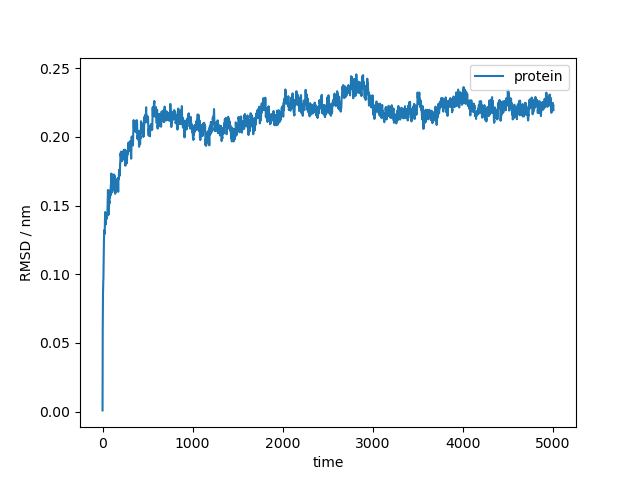

In [11]:
from IPython.display import Image
Image(filename=path1)

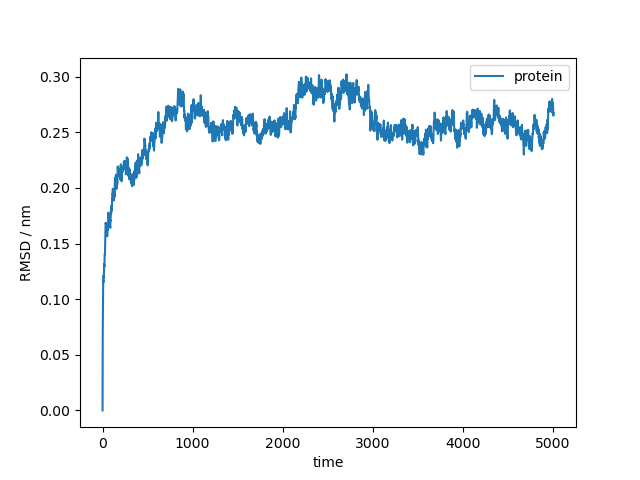

In [12]:
Image(filename=path2)

In [15]:
agent = MDAgent(ckpt_dir="ckpt_3")
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_182724: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_182724
 1MBN_182742: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_182746: Initial positions for simulation sim0_182746
 sim0_182746: Basic Simulation of Protein 1MBN_182742
 rec0_182756: Simulation trajectory for protein 1MBN_182742 and simulation sim0_182746
 rec1_182756: Simulation state log for protein 1MBN_182742 and simulation sim0_182746
 rec2_182756: Simulation pdb frames for protein 1MBN_182742 and simulation sim0_182746
 top_sim0_213932: Initial positions for simulation sim0_213932
 sim0_213932: Basic Simulation of Protein 1MBN_182742
 rec0_213934: Simulation trajectory for protein 1MBN_182742 and simulation sim0_213932
 rec1_213934: Simulation state log for protein 1MBN_182742 and simulation sim0_213932
 rec2_213934: Simulation pdb frames for protein 1MBN_1827

In [16]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_file_1 = matches[0]
traj_file_2 = matches[1]
traj_path1 = registry.get_mapped_path(traj_file_1)
traj_path2 = registry.get_mapped_path(traj_file_2)
assert os.path.exists(traj_path1)
assert os.path.exists(traj_path2)

matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
top_file_1 = matches[0]
top_file_2 = matches[1]
top_path1 = registry.get_mapped_path(top_file_1)
top_path2 = registry.get_mapped_path(top_file_2)
assert os.path.exists(top_path1)
assert os.path.exists(top_path2)

print(f"It's asserted that file paths for {traj_file_1}, {traj_file_2}, {top_file_1}, and {top_file_2} exist")

It's asserted that file paths for rec0_182756, rec0_213934, top_sim0_182746, and top_sim0_213932 exist


In [21]:
#secondary structure
import mdtraj as md

print(traj_file_1)
traj = md.load(traj_path1, top=top_path1)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj[-1],simplified=True) # last frame
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

rec0_182756
Number of residues in chains:  3
Number of residues in sheets:  0
Number of residues in helices:  109
Number of residues in coils:  44


In [23]:
print(traj_file_2)
traj = md.load(traj_path2, top=top_path2)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj[-1],simplified=True) # last frame
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

rec0_213934
Number of residues in chains:  3
Number of residues in sheets:  0
Number of residues in helices:  109
Number of residues in coils:  44


# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅
